In [7]:
from tensorflow import keras
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Num GPUs Available:  0


In [16]:
df = pd.read_pickle('D:\\Dissertation\\csi-dataset-40-7-9.pkl')
# df['Sample'] = df['Sample'].astype(np.float32)
# dataset = pd.concat(df, ignore_index=True)

In [38]:
Y = df['Label'].values
X = df['Sample'].values
X = [[np.asarray(sample) for sample in i] for i in X]
X = np.asarray(X).astype('float32')
# X = np.asarray(X).astype('float32'

In [39]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
vectorized_y = np_utils.to_categorical(encoded_Y)



In [40]:
print(encoder.classes_)

['I1' 'I13' 'I2' 'I3' 'I4' 'I5' 'I6' 'I7']


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,vectorized_y, test_size=0.3, random_state=40)

In [42]:

Y_train.shape

(19379, 8)

In [43]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],X_test.shape[2],1))


In [44]:
X_train = tf.convert_to_tensor(X_train)
Y_train = tf.convert_to_tensor(Y_train)

In [45]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=32, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=16, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=12, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling2D()(conv3)

    output_layer = keras.layers.Dense(8, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [46]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 180, 1)]     0         
                                                                 
 conv1d_9 (Conv1D)           (None, 256, 180, 32)      128       
                                                                 
 batch_normalization_9 (Batc  (None, 256, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 re_lu_9 (ReLU)              (None, 256, 180, 32)      0         
                                                                 
 conv1d_10 (Conv1D)          (None, 256, 180, 16)      1552      
                                                                 
 batch_normalization_10 (Bat  (None, 256, 180, 16)     64        
 chNormalization)                                          

In [49]:
epochs = 150
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model2.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)
history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/150


ValueError: in user code:

    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\Anaconda\envs\py3-TF2.0\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 5) are incompatible


In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, Y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

45/45 [==============================] - 6s 126ms/step - loss: 0.7321 - categorical_accuracy: 0.6634
Test accuracy 0.6633802652359009
Test loss 0.7320586442947388


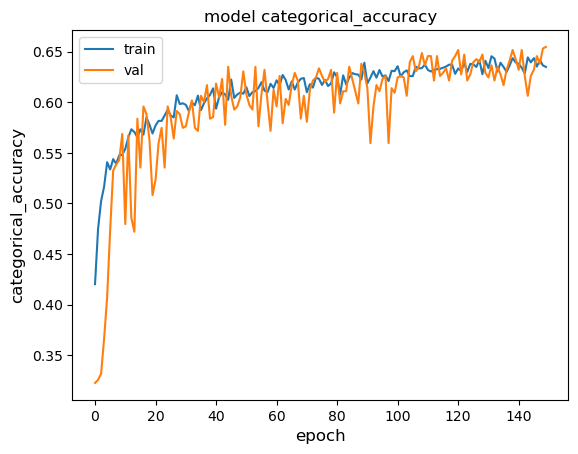

In [ ]:
metric = "categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()